In [1]:
import pandas as pd
import numpy as np

import matplotlib as pyplot
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

# Review the data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

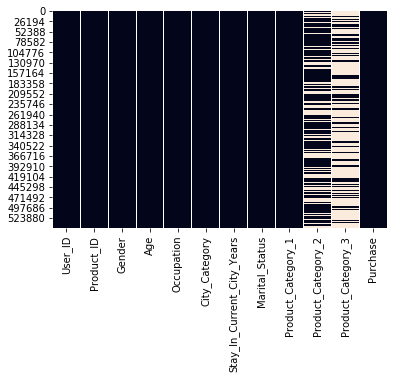

In [7]:
sns.heatmap(df.isnull(), cbar=False)

In [8]:
# Clear null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

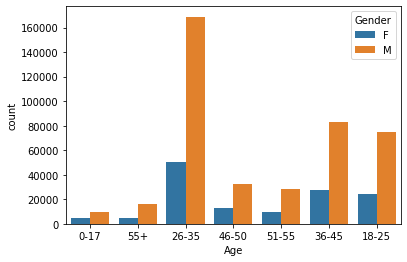

In [9]:
sns.countplot(df['Age'], hue=df['Gender'])

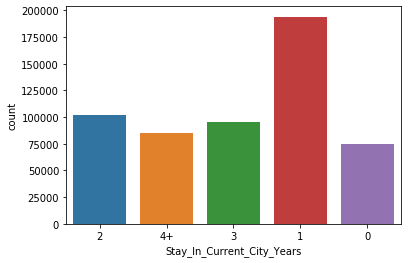

In [10]:
sns.countplot(df['Stay_In_Current_City_Years'])

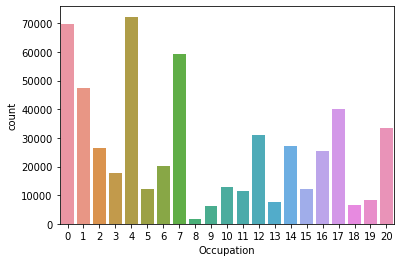

In [11]:
sns.countplot(df['Occupation'])

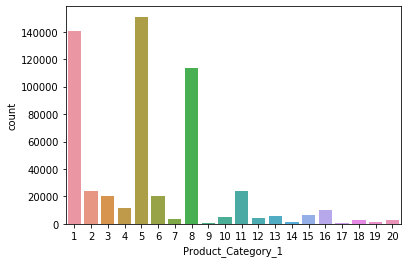

In [12]:
sns.countplot(df['Product_Category_1'])

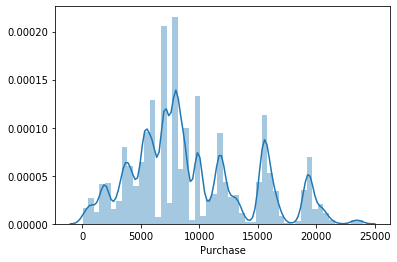

In [13]:
sns.distplot(df['Purchase'])

We have labeled data - can use supervised learning
We want to predict how much $$$ people spend - regression task

When we think about sales - consider demographic (age/gender/income/home), store (location/size/ads/product stock)

In [14]:
print(df['Product_ID'].unique())
print(len(df['Product_ID'].unique()))

['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
3631


# Prepare data

In [15]:
X = df.drop(['Purchase', 'Product_Category_2', 'Product_Category_3'], axis=1)

In [16]:
for cat in ['Age', 'City_Category', 'Stay_In_Current_City_Years']:
    tmp = pd.get_dummies(X[cat], prefix=cat, drop_first=True)
    X.drop(cat, axis=1, inplace=True)
    X = pd.concat([X, tmp], axis=1)

In [17]:
X['Gender'] = pd.get_dummies(X['Gender'], drop_first=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

for c in ['Product_ID']:
    enc = LabelEncoder()
    X[c] = enc.fit_transform(X[c])

In [19]:
X["Occupation"] = X["Occupation"].astype('category')

In [20]:
X.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,672,0,10,0,3,0,0,0,0,0,0,0,0,0,1,0,0
1,1000001,2376,0,10,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1000001,852,0,10,0,12,0,0,0,0,0,0,0,0,0,1,0,0
3,1000001,828,0,10,0,12,0,0,0,0,0,0,0,0,0,1,0,0
4,1000002,2734,1,16,0,8,0,0,0,0,0,1,0,1,0,0,0,1


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   User_ID                        550068 non-null  int64   
 1   Product_ID                     550068 non-null  int32   
 2   Gender                         550068 non-null  uint8   
 3   Occupation                     550068 non-null  category
 4   Marital_Status                 550068 non-null  int64   
 5   Product_Category_1             550068 non-null  int64   
 6   Age_18-25                      550068 non-null  uint8   
 7   Age_26-35                      550068 non-null  uint8   
 8   Age_36-45                      550068 non-null  uint8   
 9   Age_46-50                      550068 non-null  uint8   
 10  Age_51-55                      550068 non-null  uint8   
 11  Age_55+                        550068 non-null  uint8   
 12  City_Category_B 

In [22]:
y = df["Purchase"]

In [23]:
X = X.drop(["User_ID"], axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

## Regression Model Comparison

In [26]:
import sklearn
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm

In [27]:
from sklearn import metrics

def get_metrics(reg, y_test, y_pred):
    res = []
    
    res.append(str(reg.__class__.__name__))
    mae = metrics.mean_absolute_error(y_test, y_pred)
    res.append(mae)
    mse = metrics.mean_squared_error(y_test, y_pred)
    res.append(mse)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    res.append(rmse)
    r2 = metrics.r2_score(y_test, y_pred)
    res.append(r2)
    
    return res
               
def show_metrics(res):
    print(res[0])
    print(' MAE : ', res[1])
    print(' MSE : ', res[2])
    print(' RMSE: ', res[3])
    print(' R^2 : ', res[4])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 1/3, random_state = 0)

In [29]:
# Start with plolynomial regression
pf = PolynomialFeatures(degree=2)
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.fit_transform(X_test)

In [30]:
lr = LinearRegression()
lr.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = lr.predict(X_poly_test)
print(y_pred)

[13555.  5193.  8640. ...  7041.  7711. 12155.]


In [32]:
results = []
m = get_metrics(lr, y_test, y_pred)
m[0] = 'PolynomialRegression'
show_metrics(m)
results.append(m)

PolynomialRegression
 MAE :  3309.958206985318
 MSE :  19261757.748472918
 RMSE:  4388.821908949248
 R^2 :  0.23849121551232466


In [33]:
regressors = [
    Ridge(alpha=.5),
    Lasso(alpha=0.1),
    LinearRegression(), 
    DecisionTreeRegressor(), 
    RandomForestRegressor(),
    GradientBoostingRegressor(), 
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, 
                     max_depth = 5, alpha = 10, n_estimators = 10), 
    # svm.SVC(kernel='rbf', gamma=0.7, C=1.0),
    KNeighborsRegressor(n_neighbors=3)
]

### Commented out regressors are processing over 100 minutes

In [34]:
for r in regressors: 
    print('======================================================================================')
    print('Running %s' % (r))
    r.fit(X_train, y_train)
    # print('Accuracy score for %s is %s' % (r, r.score(X_test, y_test) * 100))
    m = get_metrics(r, y_test, r.predict(X_test))
    show_metrics(m)
    results.append(m)
    print('======================================================================================')
    print('')

Running Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge
 MAE :  3593.7867622984763
 MSE :  21952039.018481284
 RMSE:  4685.300312518002
 R^2 :  0.1321316170475142

Running Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso
 MAE :  3593.7848869242807
 MSE :  21952043.356074445
 RMSE:  4685.300775411803
 R^2 :  0.1321314455618513

Running LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
LinearRegression
 MAE :  3593.786431714285
 MSE :  21952039.006256834
 RMSE:  4685.300311213448
 R^2 :  0.13213161753080482

Running DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,

### Try ANN

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [36]:
model = Sequential()
model.add(Dense(17, input_dim=17, kernel_initializer='normal', activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))

optimizer = Adam(lr=0.35)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])

In [37]:
model.fit(X_train, y_train, epochs=300, batch_size=5000, verbose=1)

Epoch 1/300
366712/366712 [==============================] - 0s 1us/step - loss: 26250183.5921 - mse: 26250192.0000 - mae: 3795.1655
Epoch 2/300
366712/366712 [==============================] - 0s 1us/step - loss: 18074555.0054 - mse: 18074556.0000 - mae: 3146.5696
Epoch 3/300
366712/366712 [==============================] - 0s 1us/step - loss: 17228205.3537 - mse: 17228208.0000 - mae: 3051.3696
Epoch 4/300
366712/366712 [==============================] - 0s 1us/step - loss: 16850510.2117 - mse: 16850510.0000 - mae: 3011.1182
Epoch 5/300
366712/366712 [==============================] - 0s 1us/step - loss: 17581072.3568 - mse: 17581074.0000 - mae: 3091.6904
Epoch 6/300
366712/366712 [==============================] - 0s 1us/step - loss: 16342514.0416 - mse: 16342516.0000 - mae: 2964.5261
Epoch 7/300
366712/366712 [==============================] - 0s 1us/step - loss: 15924482.9780 - mse: 15924482.0000 - mae: 2927.9519
Epoch 8/300
366712/366712 [==============================] - 0s 1us/s

366712/366712 [==============================] - 0s 1us/step - loss: 9591201.9888 - mse: 9591201.0000 - mae: 2338.4868
Epoch 63/300
366712/366712 [==============================] - 0s 1us/step - loss: 9515608.1049 - mse: 9515607.0000 - mae: 2329.4275
Epoch 64/300
366712/366712 [==============================] - 0s 1us/step - loss: 9432796.5129 - mse: 9432798.0000 - mae: 2318.8931
Epoch 65/300
366712/366712 [==============================] - 0s 1us/step - loss: 9783744.1578 - mse: 9783743.0000 - mae: 2353.0864
Epoch 66/300
366712/366712 [==============================] - 0s 1us/step - loss: 9355371.6551 - mse: 9355372.0000 - mae: 2306.7048
Epoch 67/300
366712/366712 [==============================] - 0s 1us/step - loss: 9484201.5823 - mse: 9484203.0000 - mae: 2318.4502
Epoch 68/300
366712/366712 [==============================] - 0s 1us/step - loss: 9490307.3100 - mse: 9490306.0000 - mae: 2318.1479
Epoch 69/300
366712/366712 [==============================] - 0s 1us/step - loss: 9381310

Epoch 124/300
366712/366712 [==============================] - 0s 1us/step - loss: 9342270.2427 - mse: 9342271.0000 - mae: 2308.9673
Epoch 125/300
366712/366712 [==============================] - 0s 1us/step - loss: 9420711.7633 - mse: 9420711.0000 - mae: 2317.5581
Epoch 126/300
366712/366712 [==============================] - 0s 1us/step - loss: 9337466.4532 - mse: 9337467.0000 - mae: 2311.9495
Epoch 127/300
366712/366712 [==============================] - 0s 1us/step - loss: 9369481.3257 - mse: 9369480.0000 - mae: 2311.1223
Epoch 128/300
366712/366712 [==============================] - 0s 1us/step - loss: 9246299.3972 - mse: 9246298.0000 - mae: 2299.7759
Epoch 129/300
366712/366712 [==============================] - 0s 1us/step - loss: 9408368.7301 - mse: 9408369.0000 - mae: 2315.3987
Epoch 130/300
366712/366712 [==============================] - 0s 1us/step - loss: 9340619.1981 - mse: 9340620.0000 - mae: 2308.2290
Epoch 131/300
366712/366712 [==============================] - 0s 1us

366712/366712 [==============================] - 0s 1us/step - loss: 9272674.5926 - mse: 9272673.0000 - mae: 2301.5718
Epoch 186/300
366712/366712 [==============================] - 0s 1us/step - loss: 9216495.2540 - mse: 9216495.0000 - mae: 2293.9473
Epoch 187/300
366712/366712 [==============================] - 0s 1us/step - loss: 9358852.3012 - mse: 9358852.0000 - mae: 2308.9929
Epoch 188/300
366712/366712 [==============================] - 0s 1us/step - loss: 9255232.3812 - mse: 9255233.0000 - mae: 2297.8037
Epoch 189/300
366712/366712 [==============================] - 0s 1us/step - loss: 9261265.4537 - mse: 9261266.0000 - mae: 2297.3308
Epoch 190/300
366712/366712 [==============================] - 0s 1us/step - loss: 9244177.6707 - mse: 9244179.0000 - mae: 2297.7053
Epoch 191/300
366712/366712 [==============================] - 0s 1us/step - loss: 9300103.0852 - mse: 9300102.0000 - mae: 2301.1338
Epoch 192/300
366712/366712 [==============================] - 0s 1us/step - loss: 

366712/366712 [==============================] - 0s 1us/step - loss: 9245555.6390 - mse: 9245556.0000 - mae: 2298.8755
Epoch 247/300
366712/366712 [==============================] - 0s 1us/step - loss: 9363285.7660 - mse: 9363286.0000 - mae: 2304.1472
Epoch 248/300
366712/366712 [==============================] - 0s 1us/step - loss: 9394991.2534 - mse: 9394992.0000 - mae: 2309.0154
Epoch 249/300
366712/366712 [==============================] - 0s 1us/step - loss: 9284765.6645 - mse: 9284765.0000 - mae: 2299.2639
Epoch 250/300
366712/366712 [==============================] - 0s 1us/step - loss: 9135994.2563 - mse: 9135993.0000 - mae: 2280.0906
Epoch 251/300
366712/366712 [==============================] - 0s 1us/step - loss: 9215400.4340 - mse: 9215401.0000 - mae: 2293.2107
Epoch 252/300
366712/366712 [==============================] - 0s 1us/step - loss: 9222095.8303 - mse: 9222094.0000 - mae: 2291.9761
Epoch 253/300
366712/366712 [==============================] - 0s 1us/step - loss: 

In [38]:
m = get_metrics(model, y_test, model.predict(X_test))
m[0] = 'ANN'
show_metrics(m)
results.append(m)

ANN
 MAE :  2280.8142783018657
 MSE :  9094922.777238183
 RMSE:  3015.778966906922
 R^2 :  0.640434498266234


In [39]:
res = pd.DataFrame(np.array(results))
res.columns = ['Name', 'MAE', 'MSE', 'RMSE', 'R^2']

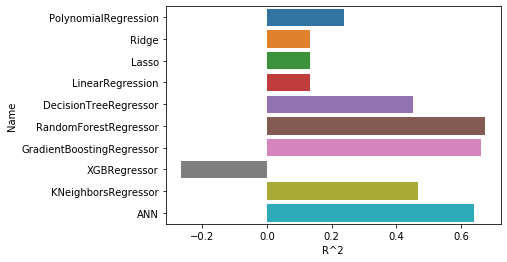

In [40]:
sns.barplot(data=res, y='Name', x='R^2')

In [41]:
df_r = pd.DataFrame(results)
df_r.head()

,0,1,2,3,4
0,PolynomialRegression,3309.958207,1.926176e+07,4388.821909,0.238491
1,Ridge,3593.786762,2.195204e+07,4685.300313,0.132132
2,Lasso,3593.784887,2.195204e+07,4685.300775,0.132131
3,LinearRegression,3593.786432,2.195204e+07,4685.300311,0.132132
4,DecisionTreeRegressor,2630.830455,1.387240e+07,3724.567492,0.451558


# Clustering Algorithm Comparison

### K-Means

Running KMeans with 1 clusters
Running KMeans with 2 clusters
Running KMeans with 3 clusters
Running KMeans with 4 clusters
Running KMeans with 5 clusters
Running KMeans with 6 clusters
Running KMeans with 7 clusters
Running KMeans with 8 clusters
Running KMeans with 9 clusters
Running KMeans with 10 clusters


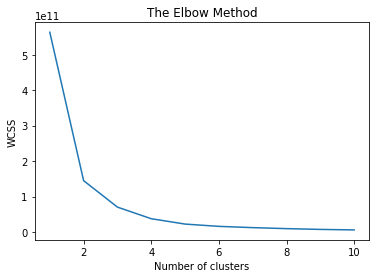

In [42]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    print("Running KMeans with %s clusters" % (i))
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # sum of squares of the distances of each data point in all clusters to their centroids
plt.show()

### PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_ 

In [44]:
print(explained_variance) # % of variance explained by each of the selected components

[9.99941231e-01 4.15276886e-05 1.50365374e-05]


In [45]:
print(pca.components_)

[[ 9.99999957e-01  6.78015193e-06  4.78419549e-05  5.64613034e-06
   2.90559777e-04 -5.80060188e-06 -7.43338167e-06  4.90866276e-06
   2.69169851e-06  2.62798511e-06  2.23825144e-06 -2.70419324e-06
   3.99272802e-06 -2.55125162e-07  1.24345339e-06  1.95922614e-07
  -1.46872062e-06]
 [-4.57358766e-05  7.79265580e-03  9.99906755e-01  1.83354708e-03
  -7.73317533e-03 -5.71348649e-03 -1.68022493e-03  3.58707265e-03
   8.55606948e-04  1.20291330e-03  1.30603065e-03 -8.90990100e-04
   2.46657997e-03 -1.58035596e-04 -7.60300602e-04  1.51493781e-03
   7.71763687e-04]
 [-2.90943163e-04 -5.05095526e-03  7.73703507e-03  2.48351949e-03
   9.99938267e-01 -3.49261764e-03 -2.25884654e-03  1.17554421e-03
   1.80871965e-03  1.67135689e-03  1.67204132e-03 -7.35715933e-04
  -1.03593996e-03  7.69793887e-04 -7.45522006e-04 -1.04656767e-03
   6.59269406e-04]]


# Feature Selection

In [46]:
from sklearn.feature_selection import VarianceThreshold
Xvt = X.copy(deep=True)
sel = VarianceThreshold(threshold=(.8 * (1 - .8))) 
sel.fit_transform(Xvt)

array([[672, 0, 10, ..., 0, 0, 0],
       [2376, 0, 10, ..., 0, 0, 0],
       [852, 0, 10, ..., 0, 0, 0],
       ...,
       [3568, 0, 15, ..., 1, 0, 0],
       [3568, 0, 1, ..., 0, 1, 0],
       [3566, 0, 0, ..., 1, 0, 0]], dtype=object)

In [47]:
regressors = [
    LinearRegression(), 
    RandomForestRegressor(),
    KNeighborsRegressor(n_neighbors=3)
]

X_train, X_test, y_train, y_test = train_test_split(Xvt, y, test_size = 1/3, random_state = 0)

for r in regressors: 
    print('======================================================================================')
    print('Running %s' % (r))
    r.fit(X_train, y_train)

    m = get_metrics(r, y_test, r.predict(X_test))
    show_metrics(m)
    print('======================================================================================')
    print('')

Running LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
LinearRegression
 MAE :  3593.7864317142844
 MSE :  21952039.006256834
 RMSE:  4685.300311213448
 R^2 :  0.13213161753080482

Running RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
RandomForestRegressor
 MAE :  2103.764583410758
 MSE :  8209169.894973392
 RMSE:  2865.1648983912587
 R^2 :  0.6754525173659389

Running KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,

### RFE

In [48]:
from sklearn.feature_selection import RFE

regressors = [
    LinearRegression(), 
    # RandomForestRegressor(),
    DecisionTreeRegressor(), 
    GradientBoostingRegressor()
]

X_train, X_test, y_train, y_test = train_test_split(Xvt, y, test_size = 1/3, random_state = 0)

for r in regressors: 
    print('======================================================================================')
    print('Running %s' % (r))
    rfe = RFE(r, 3)
    ref = rfe.fit(X_train, y_train)
    print("Regressor: " + str(r.__class__.__name__))
    print("Support")
    print(rfe.support_)
    print("Ranking")
    print(rfe.ranking_)
    print('======================================================================================')
    print('')

Running LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Regressor: LinearRegression
Support
[False  True False False  True False False False False False False False
  True False False False False]
Ranking
[15  1 14  9  1  7  6  4  5  2  3  8  1 13 10 12 11]

Running DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Regressor: DecisionTreeRegressor
Support
[ True False  True False  True False False False False False False False
 False False False False False]
Ranking
[ 1  7  1  4  1 11  5  9 13 14 15  3 12  2  8  6 10]

Running GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
      